In [1]:
import pandas as pd

df = pd.read_csv(r"datasets\Fraud_Payments (2)\Data\fraud_payment_data\fraud_payment_data\fraud_payment_data")
df.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


Based on the column names and the details provided by JPMorgan, here’s what each column likely represents:

1. **Time_step**: Represents the timestamp or sequential step of when the transaction occurred. Could be a datetime value or an event-based index.
2. **Transaction_Id**: A unique identifier for each transaction.
3. **Sender_Id**: A unique identifier for the entity (individual or business) initiating the transaction. Some values are missing, possibly indicating transactions without a clear sender (e.g., system-generated).
4. **Sender_Account**: The bank account number or identifier of the sender.
5. **Sender_Country**: The country associated with the sender’s account.
6. **Sender_Sector**: A numerical representation of the sender’s industry sector (e.g., retail, finance, healthcare). Since it’s a float, it may be encoded.
7. **Sender_lob**: "LOB" stands for **Line of Business**, indicating the division or department of the sender (e.g., corporate banking, wealth management).
8. **Bene_Id**: The unique identifier for the beneficiary (recipient of the transaction).
9. **Bene_Account**: The bank account number or identifier of the beneficiary.
10. **Bene_Country**: The country associated with the beneficiary’s account.
11. **USD_amount**: The amount of money transferred in US dollars.
12. **Label**: Indicates whether a transaction is fraudulent (1) or not (0). This is the target variable.
13. **Transaction_Type**: The type of transaction, such as wire transfer, credit card payment, ACH transfer, etc.

This dataset is designed for fraud detection, so missing values in sender/beneficiary fields might be meaningful (e.g., anonymous transactions, incomplete records). The **Label** column is the key variable for training models to detect fraudulent transactions.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 148.6+ MB


In [5]:
df.describe()

,Sender_Sector,USD_amount,Label
count,1.279291e+06,1.498177e+06,1.498177e+06
mean,2.502133e+04,5.134698e+02,2.057100e-02
std,1.443171e+04,5.398089e+02,1.419431e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.253400e+04,1.386900e+02,0.000000e+00
50%,2.502300e+04,4.041600e+02,0.000000e+00
75%,3.753050e+04,7.340700e+02,0.000000e+00
max,4.999900e+04,1.999894e+04,1.000000e+00


In [6]:
df.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id           218886
Sender_Account      218886
Sender_Country      218886
Sender_Sector       218886
Sender_lob          218886
Bene_Id             215893
Bene_Account        215893
Bene_Country        215893
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

In [2]:
df.shape

(1498177, 13)

In [8]:
1498177 - 218886

1279291

In [9]:
1498177 - 215893

1282284

In [10]:
df[['Sender_Id', 'Sender_Account', 'Sender_Country'	, 'Sender_Sector', 'Sender_lob', 'Bene_Id', 'Bene_Account', 'Bene_Country', 'USD_amount']].head()

,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount
0,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43
1,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78
2,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54
3,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09
4,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78


In [3]:
categorical_cols = ['Sender_Id', 'Sender_Account', 'Sender_Country', 'Sender_lob', 
                    'Bene_Id', 'Bene_Account', 'Bene_Country']

df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [5]:
df['Sender_Sector'] = df['Sender_Sector'].fillna(0)

In [6]:
df['USD_amount'] = df['USD_amount'].fillna(0)

In [14]:
df.isnull().sum()

Time_step           0
Transaction_Id      0
Sender_Id           0
Sender_Account      0
Sender_Country      0
Sender_Sector       0
Sender_lob          0
Bene_Id             0
Bene_Account        0
Bene_Country        0
USD_amount          0
Label               0
Transaction_Type    0
dtype: int64

In [15]:
df.Time_step.head()

0    2022-03-15 10:24:00
1    2022-03-15 10:24:00
2    2022-03-15 10:24:00
3    2022-03-15 10:24:00
4    2022-03-15 10:24:00
Name: Time_step, dtype: object

In [16]:
df.Time_step.tail()

1498172    2054-09-14 13:17:24
1498173    2054-09-15 00:57:24
1498174    2054-09-15 01:17:24
1498175    2054-09-15 12:57:24
1498176    2054-09-15 13:07:24
Name: Time_step, dtype: object

In [7]:
df.Time_step = pd.to_datetime(df.Time_step)

## Extracting Temporal Features

In [8]:
df['Year'] = df['Time_step'].dt.year
df['Month'] = df['Time_step'].dt.month
df['Day'] = df['Time_step'].dt.day
df['Hour'] = df['Time_step'].dt.hour
df['Day_of_Week'] = df['Time_step'].dt.dayofweek  # Monday=0, Sunday=6
df['Week_of_Year'] = df['Time_step'].dt.isocalendar().week
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df['Is_Business_Hour'] = df['Hour'].apply(lambda x: 1 if 9 <= x <= 17 else 0)  # 9 AM - 5 PM

In [22]:
df.Is_Weekend.value_counts()

Is_Weekend
0    1068587
1     429590
Name: count, dtype: int64

In [23]:
df.Is_Business_Hour.value_counts()

Is_Business_Hour
0    933502
1    564675
Name: count, dtype: int64

In [9]:
df['Time_Since_Last_Transaction'] = df.groupby('Sender_Id')['Time_step'].diff().dt.total_seconds()

In [10]:
df['Time_Since_Last_Transaction'].isnull().sum()

np.int64(59072)

In [11]:
df['Time_Since_Last_Transaction'] = df['Time_Since_Last_Transaction'].fillna(0)

In [29]:
df['Time_Since_Last_Transaction'].isnull().sum()

np.int64(0)

In [12]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Part_of_Day'] = df['Hour'].apply(get_part_of_day)

In [31]:
df.Part_of_Day.value_counts()

Part_of_Day
Night        497643
Morning      432603
Afternoon    317683
Evening      250248
Name: count, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Time_step                    1498177 non-null  datetime64[ns]
 1   Transaction_Id               1498177 non-null  object        
 2   Sender_Id                    1498177 non-null  object        
 3   Sender_Account               1498177 non-null  object        
 4   Sender_Country               1498177 non-null  object        
 5   Sender_Sector                1498177 non-null  float64       
 6   Sender_lob                   1498177 non-null  object        
 7   Bene_Id                      1498177 non-null  object        
 8   Bene_Account                 1498177 non-null  object        
 9   Bene_Country                 1498177 non-null  object        
 10  USD_amount                   1498177 non-null  float64       
 11  Label      

In [33]:
df.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,...,Year,Month,Day,Hour,Day_of_Week,Week_of_Year,Is_Weekend,Is_Business_Hour,Time_Since_Last_Transaction,Part_of_Day
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,Unknown,Unknown,Unknown,...,2022,3,15,10,1,11,0,1,0.0,Morning
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,...,2022,3,15,10,1,11,0,1,0.0,Morning
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,Unknown,Unknown,Unknown,0.0,Unknown,JPMC-CLIENT-9812,ACCOUNT-9826,USA,...,2022,3,15,10,1,11,0,1,0.0,Morning
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,...,2022,3,15,10,1,11,0,1,0.0,Morning
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,Unknown,Unknown,Unknown,0.0,Unknown,JPMC-CLIENT-9789,ACCOUNT-9800,USA,...,2022,3,15,10,1,11,0,1,0.0,Morning


In [39]:
df.describe()

,Time_step,Sender_Sector,USD_amount,Label,Year,Month,Day,Hour,Day_of_Week,Week_of_Year,Is_Weekend,Is_Business_Hour,Time_Since_Last_Transaction
count,1498177,1.498177e+06,1.498177e+06,1.498177e+06,1.498177e+06,1.498177e+06,1.498177e+06,1.498177e+06,1.498177e+06,1498177.0,1.498177e+06,1.498177e+06,1.498177e+06
mean,2038-06-16 16:05:19.737899520,2.136568e+04,5.134698e+02,2.057100e-02,2.037958e+03,6.503619e+00,1.575773e+01,1.147653e+01,3.005203e+00,26.508499,2.867418e-01,3.769081e-01,6.748899e+04
min,2022-03-15 10:24:00,0.000000e+00,0.000000e+00,0.000000e+00,2.022000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2030-03-29 18:54:50,6.078000e+03,1.386900e+02,0.000000e+00,2.030000e+03,4.000000e+00,8.000000e+00,5.000000e+00,1.000000e+00,14.0,0.000000e+00,0.000000e+00,6.000000e+02
50%,2038-05-25 09:25:42,2.075700e+04,4.041600e+02,0.000000e+00,2.038000e+03,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+00,26.0,0.000000e+00,0.000000e+00,4.320000e+04
75%,2046-08-19 14:06:34,3.539000e+04,7.340700e+02,0.000000e+00,2.046000e+03,9.000000e+00,2.300000e+01,1.700000e+01,5.000000e+00,39.0,1.000000e+00,1.000000e+00,4.380000e+04
max,2054-09-15 13:07:24,4.999900e+04,1.999894e+04,1.000000e+00,2.054000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,53.0,1.000000e+00,1.000000e+00,4.843800e+06
std,NaN,1.599846e+04,5.398089e+02,1.419431e-01,9.405885e+00,3.428495e+00,8.795951e+00,6.909602e+00,1.999967e+00,14.968786,4.522401e-01,4.846117e-01,1.632818e+05


## Univariate Analysis (Feature Distribution)

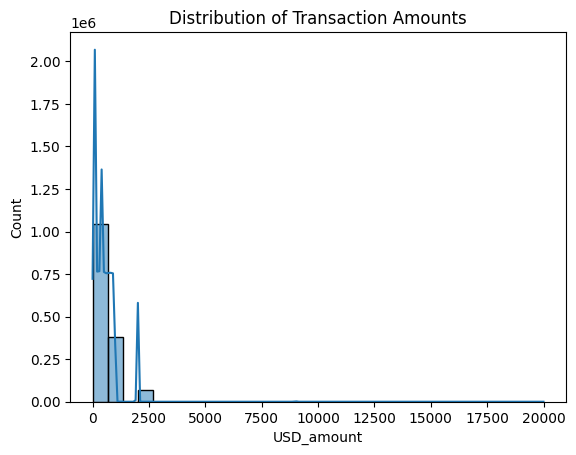

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.USD_amount, bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

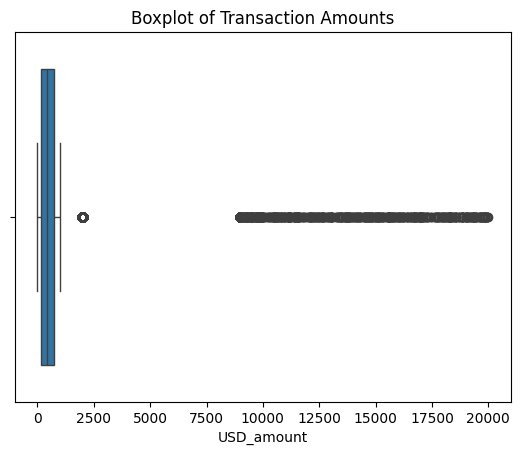

In [43]:
sns.boxplot(x=df.USD_amount)
plt.title('Boxplot of Transaction Amounts')
plt.show()

# there are many outliers which depict fraud (large transactions).

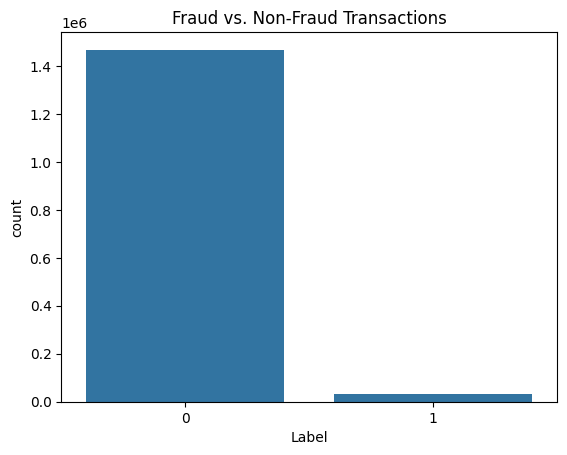

In [44]:
sns.countplot(x=df.Label)
plt.title('Fraud vs. Non-Fraud Transactions')
plt.show()

# Here fraud cases are very low, dataset is imbalanced

In [53]:
df.Label.value_counts()

Label
0    1467358
1      30819
Name: count, dtype: int64

In [69]:
df['Label'].value_counts(normalize=True)

Label
0    0.979429
1    0.020571
Name: proportion, dtype: float64

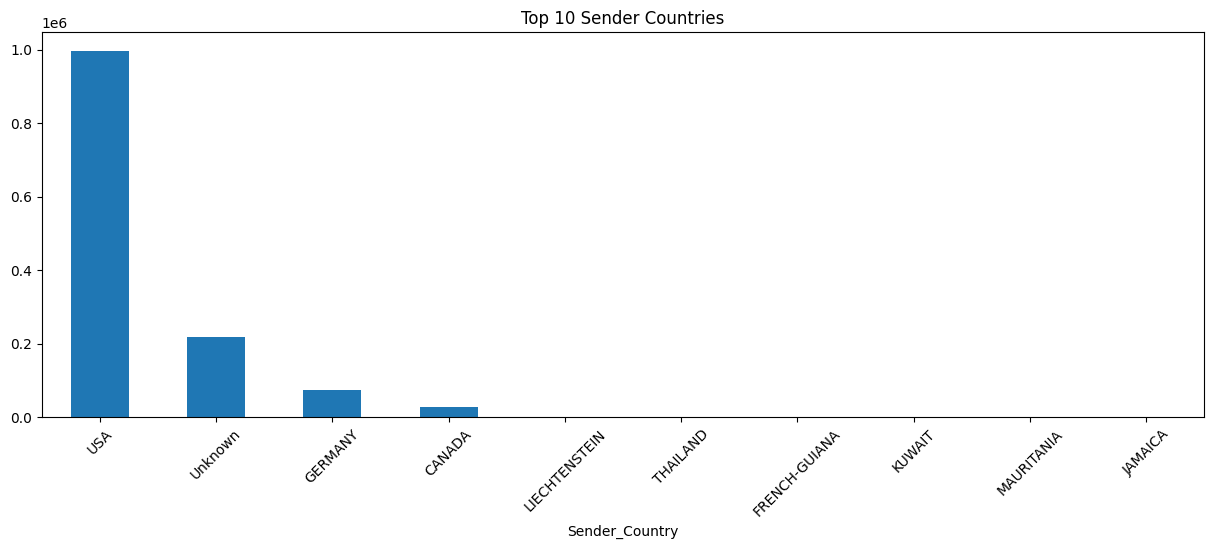

In [51]:
plt.figure(figsize=(15,5))
df.Sender_Country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sender Countries')
plt.xticks(rotation=45)
plt.show()

# Helps detect if some countries have more fraudulent transactions.

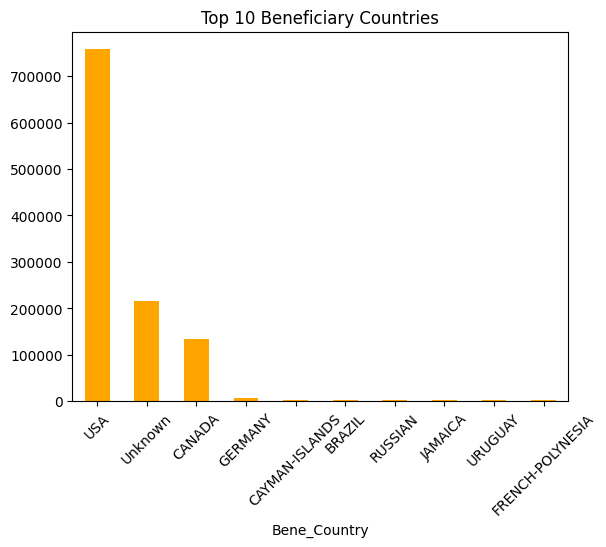

In [52]:
df.Bene_Country.value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Beneficiary Countries')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis (Relationships & Trends)

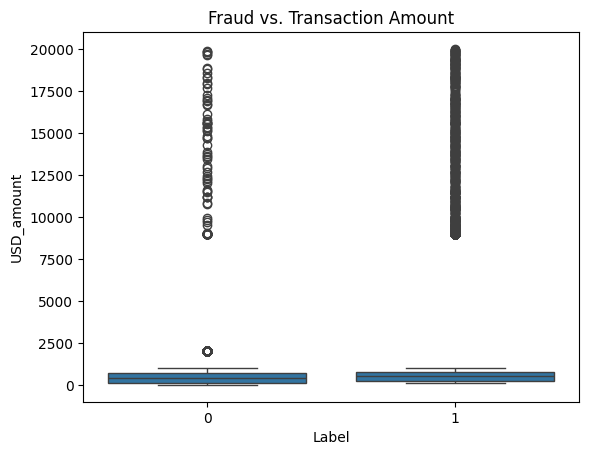

In [54]:
sns.boxplot(x=df.Label, y=df.USD_amount)
plt.title('Fraud vs. Transaction Amount')
plt.show()

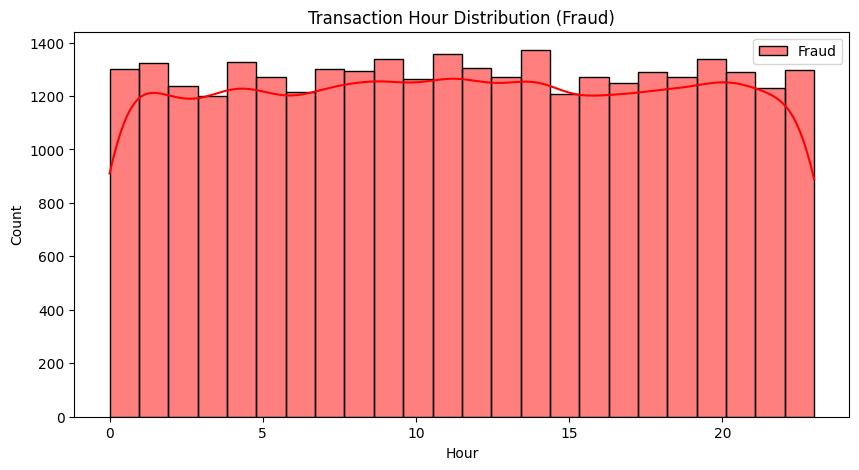

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(df[df.Label==1]['Hour'], bins=24, kde=True, color='red', label='Fraud')
plt.title('Transaction Hour Distribution (Fraud)')
plt.legend()
plt.show()

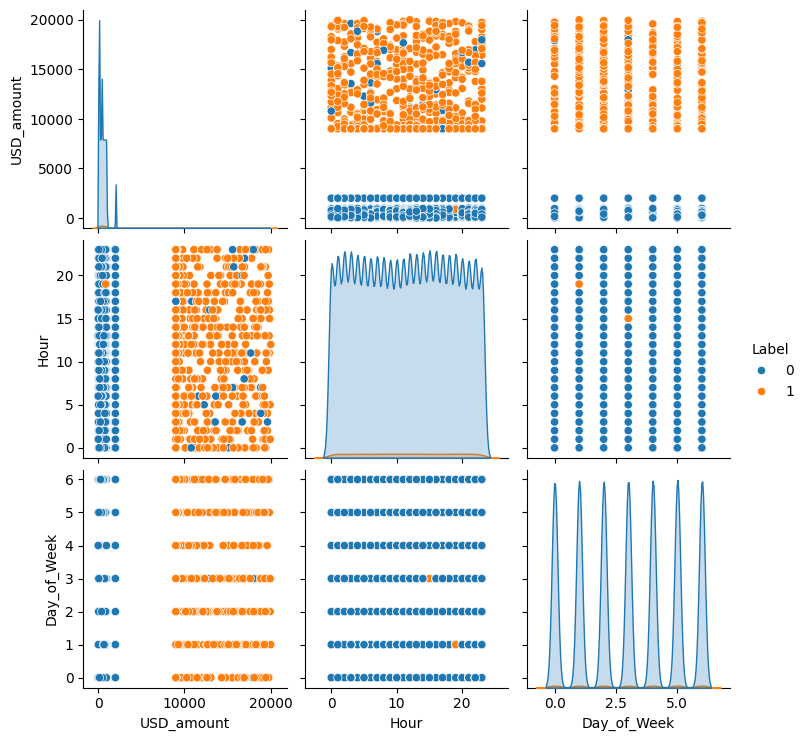

In [62]:
# Visualizing clusters of fraud vs. non-fraud transactions

sns.pairplot(df[['USD_amount', 'Hour', 'Day_of_Week', 'Label']], hue='Label')
plt.show()

In [13]:
from scipy.stats import zscore

zscore = zscore(df['USD_amount'])
(zscore[zscore.abs()>3]).count()

np.int64(1096)

In [65]:
df.groupby(['Sender_Id', 'Bene_Id'])['USD_amount'].count().sort_values(ascending=False).head(10)

Sender_Id            Bene_Id            
JPMC-CLIENT-1029601  CLIENT-1029620         61
JPMC-CLIENT-1661421  CLIENT-1661439         59
JPMC-CLIENT-2163949  CLIENT-2163951         59
JPMC-CLIENT-721458   CLIENT-721476          59
JPMC-CLIENT-1138480  CLIENT-1138482         58
JPMC-CLIENT-1097084  JPMC-CLIENT-1097086    58
JPMC-CLIENT-1375840  JPMC-CLIENT-1375842    57
JPMC-CLIENT-1730807  CLIENT-1730825         57
JPMC-CLIENT-1301766  CLIENT-1301768         56
JPMC-CLIENT-66251    CLIENT-66269           56
Name: USD_amount, dtype: int64

In [68]:
# 99th percentile transactions may be fraudulent outliers.

(df.USD_amount > df.USD_amount.quantile(0.99)).sum()

np.int64(14924)

In [14]:
df_outliers = df[df.USD_amount > 14924]
df_outliers.Label.value_counts(normalize=True)

Label
1    0.85782
0    0.14218
Name: proportion, dtype: float64

In [15]:
df['High_Amount_Flag'] = (df['USD_amount'] > 14924).astype(int)

In [75]:
df.USD_amount.describe()

count    1.498177e+06
mean     5.134698e+02
std      5.398089e+02
min      0.000000e+00
25%      1.386900e+02
50%      4.041600e+02
75%      7.340700e+02
max      1.999894e+04
Name: USD_amount, dtype: float64

In [16]:
import numpy as np

df["USD_amount_log"] = np.log1p(df.USD_amount)
df.USD_amount_log.describe()

count    1.498177e+06
mean     5.749667e+00
std      1.168600e+00
min      0.000000e+00
25%      4.939426e+00
50%      6.004282e+00
75%      6.599966e+00
max      9.903485e+00
Name: USD_amount_log, dtype: float64

In [78]:
df_outliers.Label.value_counts(normalize=True)

Label
1    0.85782
0    0.14218
Name: proportion, dtype: float64

In [82]:
df.columns

Index(['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account',
       'Sender_Country', 'Sender_Sector', 'Sender_lob', 'Bene_Id',
       'Bene_Account', 'Bene_Country', 'USD_amount', 'Label',
       'Transaction_Type', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week',
       'Week_of_Year', 'Is_Weekend', 'Is_Business_Hour',
       'Time_Since_Last_Transaction', 'Part_of_Day', 'High_Amount_Flag',
       'USD_amount_log'],
      dtype='object')

In [17]:
selected_features = ['Sender_Country', 'Sender_Sector', 'Sender_lob', 'Bene_Country',
                     'USD_amount_log', 'Transaction_Type', 'Year', 'Month', 'Day',
                     'Hour', 'Day_of_Week', 'Is_Weekend', 'Is_Business_Hour',
                     'Time_Since_Last_Transaction', 'Part_of_Day', 'High_Amount_Flag', 'Label']

df = df[selected_features]

# Model Building

In [18]:
from imblearn.over_sampling import SMOTE

X = df.drop('Label', axis=1)
y = df.Label

y.value_counts(normalize=True)

Label
0    0.979429
1    0.020571
Name: proportion, dtype: float64

In [94]:
X.dtypes

Sender_Country                  object
Sender_Sector                  float64
Sender_lob                      object
Bene_Country                    object
USD_amount_log                 float64
Transaction_Type                object
Year                             int32
Month                            int32
Day                              int32
Hour                             int32
Day_of_Week                      int32
Is_Weekend                       int64
Is_Business_Hour                 int64
Time_Since_Last_Transaction    float64
Part_of_Day                     object
High_Amount_Flag                 int64
dtype: object

In [19]:
freq_encoder = X['Sender_Country'].value_counts(normalize=True).to_dict()

X['Sender_Country'] = X['Sender_Country'].map(freq_encoder)

In [20]:
X.Sender_lob = X.Sender_lob.map({'CCB':1, 'Unknown':0})

In [21]:
X = pd.get_dummies(X, columns=['Transaction_Type'])

In [22]:
X.Part_of_Day = X.Part_of_Day.map({'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3})

In [23]:
freq_encoder1= X.Bene_Country.value_counts(normalize=True).to_dict()
X.Bene_Country = X.Bene_Country.map(freq_encoder1)

In [116]:
X.dtypes

Sender_Country                    float64
Sender_Sector                     float64
Sender_lob                          int64
Bene_Country                      float64
USD_amount_log                    float64
Year                                int32
Month                               int32
Day                                 int32
Hour                                int32
Day_of_Week                         int32
Is_Weekend                          int64
Is_Business_Hour                    int64
Time_Since_Last_Transaction       float64
Part_of_Day                         int64
High_Amount_Flag                    int64
Transaction_Type_DEPOSIT-CASH        bool
Transaction_Type_DEPOSIT-CHECK       bool
Transaction_Type_EXCHANGE            bool
Transaction_Type_MAKE-PAYMENT        bool
Transaction_Type_MOVE-FUNDS          bool
Transaction_Type_PAY-CHECK           bool
Transaction_Type_QUICK-PAYMENT       bool
Transaction_Type_WITHDRAWAL          bool
dtype: object

In [24]:
smote = SMOTE()

X, y = smote.fit_resample(X, y)
y.value_counts(normalize=True)

Label
0    0.5
1    0.5
Name: proportion, dtype: float64

In [26]:
# pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Collecting lightgbm
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.8 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# LightGBM

In [27]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight='balanced')
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1173886, number of negative: 1173886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1413
[LightGBM] [Info] Number of data points in the train set: 2347772, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=500)

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    293472
           1       0.99      0.93      0.96    293472

    accuracy                           0.96    586944
   macro avg       0.96      0.96      0.96    586944
weighted avg       0.96      0.96      0.96    586944



In [32]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Label,,
0,290772,2700
1,21250,272222


### 1️⃣ Interpreting the Results

✅ Classification Report:
1. Precision (0.93 for class 0, 0.99 for class 1):
* When the model predicts class 1 (fraudulent transactions), it's correct 99% of the time.
* When the model predicts class 0 (non-fraudulent transactions), it's correct 93% of the time.
2. Recall (0.99 for class 0, 0.93 for class 1):
* Class 0 (non-fraud) is well detected (99% recall).
* Class 1 (fraud) has slightly lower recall (93%), meaning some fraudulent transactions are being missed.

✅ Confusion Matrix:
* 2,700 False Positives: Some non-fraudulent transactions are misclassified as fraud.
* 21,250 False Negatives: Some fraudulent transactions are misclassified as non-fraud.

### 2️⃣ Next Steps for Improvement
🔹 Addressing False Negatives (FN = 21,250)
Since fraud detection is critical, we must reduce false negatives.
Lowering the threshold will increase recall (catch more fraud cases) but may slightly increase false positives.

In [33]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

In [34]:
pd.crosstab(y_test, y_pred_adjusted)

col_0,0,1
Label,,
0,287915,5557
1,18607,274865


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    293472
           1       0.99      0.93      0.96    293472

    accuracy                           0.96    586944
   macro avg       0.96      0.96      0.96    586944
weighted avg       0.96      0.96      0.96    586944



## Feature Importance Analysis

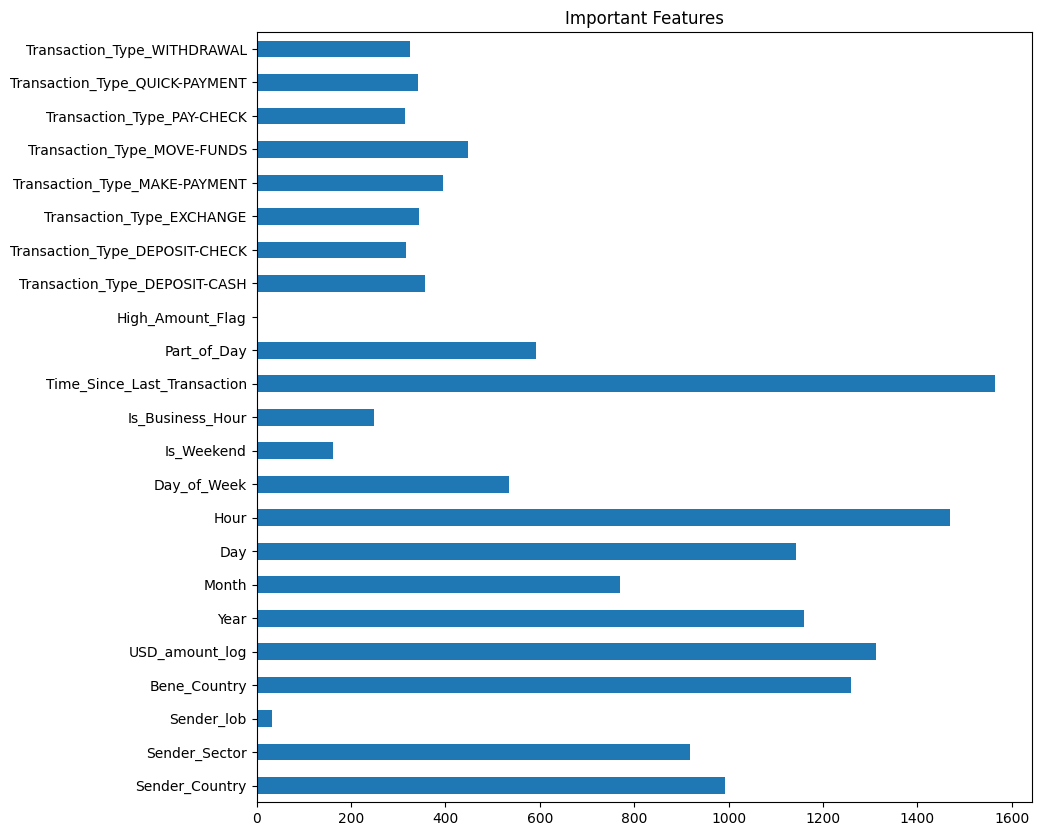

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.plot(kind='barh')
plt.title("Important Features")
plt.show()

In [41]:
X_train = X_train.drop(['Sender_lob', 'High_Amount_Flag'], axis=1)
X_test = X_test.drop(['Sender_lob', 'High_Amount_Flag'], axis=1)

In [47]:
model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight={0: 1, 1: 2})
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1173886, number of negative: 1173886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1409
[LightGBM] [Info] Number of data points in the train set: 2347772, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147


C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.05, n_estimators=500)

In [48]:
y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
Label,,
0,285611,7861
1,17181,276291


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    293472
           1       0.97      0.94      0.96    293472

    accuracy                           0.96    586944
   macro avg       0.96      0.96      0.96    586944
weighted avg       0.96      0.96      0.96    586944



In [50]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Adjust threshold to reduce False Negatives
threshold = 0.4  # Try 0.4 or lower like 0.35
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

In [51]:
print(pd.crosstab(y_test, y_pred_adjusted))
print()
print(classification_report(y_test, y_pred_adjusted))

col_0       0       1
Label                
0      279677   13795
1       14168  279304

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    293472
           1       0.95      0.95      0.95    293472

    accuracy                           0.95    586944
   macro avg       0.95      0.95      0.95    586944
weighted avg       0.95      0.95      0.95    586944



In [54]:
# import pickle

# # Save as pickle
# with open("train_test_data.pkl", "wb") as f:
#     pickle.dump((X_train, X_test, y_train, y_test), f)